✅ Đã tìm thấy model: ../experiments/AAPL.keras
Đang tính toán trên 90 phiên giao dịch gần nhất...

KẾT QUẢ ĐÁNH GIÁ ĐỘ CHÍNH XÁC (AAPL):
   - RMSE (Sai số toàn phương trung bình): 7.73
   - MAE  (Sai số tuyệt đối trung bình):   6.38
   - MAPE (Sai số phần trăm):              3.46%
   => ĐÁNH GIÁ: Model hoạt động RẤT TỐT


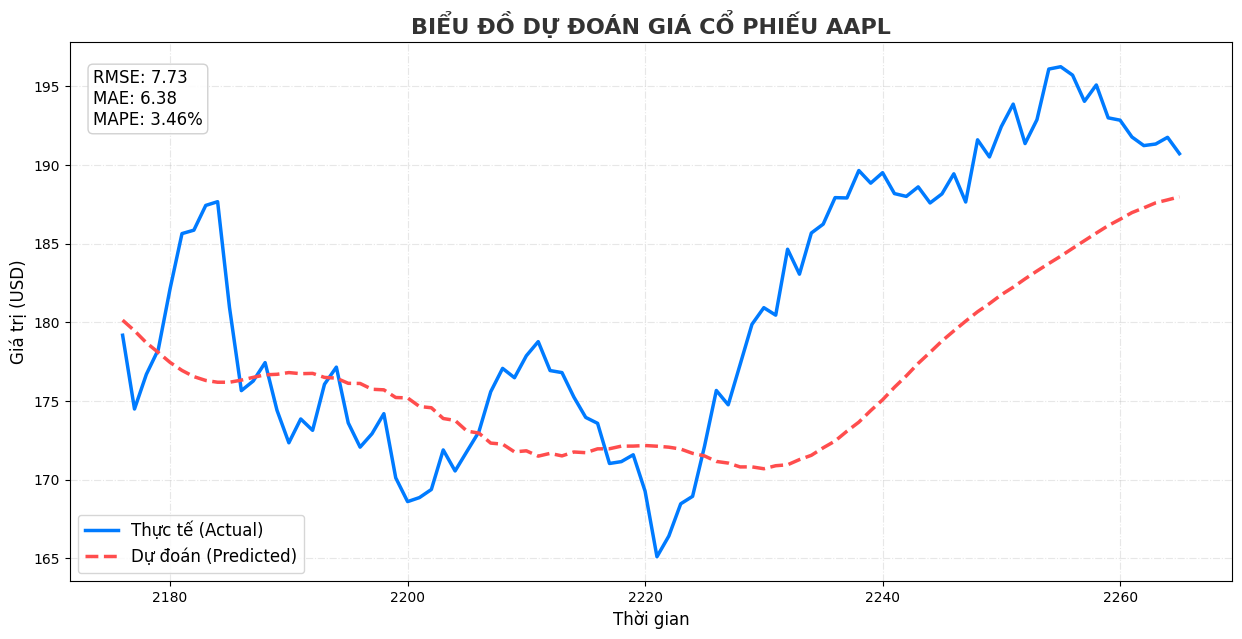

In [2]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

STOCK_SYMBOL = "AAPL" 
MODEL_PATH = f"../experiments/{STOCK_SYMBOL}.keras"
CSV_PATH = f"../data/raw/{STOCK_SYMBOL}.csv"

# --- 1. LOAD MODEL & DATA ---
if not os.path.exists(MODEL_PATH):
    print(f"❌ Lỗi: Không tìm thấy file model tại {MODEL_PATH}")
else:
    print(f"✅ Đã tìm thấy model: {MODEL_PATH}")
    model = load_model(MODEL_PATH)

    # Đọc dữ liệu
    df = pd.read_csv(CSV_PATH)
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df = df.dropna(subset=['Close'])
    
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    data = df.filter(['Close']).values

    # --- 2. CHUẨN BỊ DỮ LIỆU TEST ---
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Lấy 90 ngày gần nhất để báo cáo (Số đẹp cho đồ án)
    LOOK_BACK = 60
    TEST_DAYS = 90
    
    if len(scaled_data) < (LOOK_BACK + TEST_DAYS):
        TEST_DAYS = len(scaled_data) - LOOK_BACK

    # Tạo dữ liệu test
    start_idx = len(scaled_data) - TEST_DAYS - LOOK_BACK
    test_segment = scaled_data[start_idx:]
    
    x_test = []
    y_true = []
    
    for i in range(LOOK_BACK, len(test_segment)):
        x_test.append(test_segment[i-LOOK_BACK:i, 0])
        y_true.append(test_segment[i, 0])
        
    x_test = np.array(x_test)
    y_true = np.array(y_true)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # --- 3. DỰ ĐOÁN ---
    print(f"Đang tính toán trên {TEST_DAYS} phiên giao dịch gần nhất...")
    predictions = model.predict(x_test, verbose=0)
    
    # Đảo ngược scale
    predictions = scaler.inverse_transform(predictions)
    y_true = scaler.inverse_transform(y_true.reshape(-1, 1))

    # --- 4. TÍNH CHỈ SỐ ĐÁNH GIÁ (QUAN TRỌNG CHO BÁO CÁO) ---
    rmse = math.sqrt(mean_squared_error(y_true, predictions))
    mae = mean_absolute_error(y_true, predictions)
    mape = np.mean(np.abs((y_true - predictions) / y_true)) * 100

    print(f"\nKẾT QUẢ ĐÁNH GIÁ ĐỘ CHÍNH XÁC ({STOCK_SYMBOL}):")
    print(f"   - RMSE (Sai số toàn phương trung bình): {rmse:.2f}")
    print(f"   - MAE  (Sai số tuyệt đối trung bình):   {mae:.2f}")
    print(f"   - MAPE (Sai số phần trăm):              {mape:.2f}%")
    
    if mape < 5:
        print("   => ĐÁNH GIÁ: Model hoạt động RẤT TỐT")
    else:
        print("   => ĐÁNH GIÁ: Model hoạt động CHẤP NHẬN ĐƯỢC")

    # --- 5. VẼ BIỂU ĐỒ ---
    plt.figure(figsize=(15, 7))
    
    # Lấy ngày tháng để hiển thị
    display_dates = df.index[-TEST_DAYS:]
    
    plt.plot(display_dates, y_true, color='#007bff', label='Thực tế (Actual)', linewidth=2.5)
    plt.plot(display_dates, predictions, color='#ff4d4d', label='Dự đoán (Predicted)', linewidth=2.5, linestyle='--')
    
    plt.title(f'BIỂU ĐỒ DỰ ĐOÁN GIÁ CỔ PHIẾU {STOCK_SYMBOL}', fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel('Thời gian', fontsize=12)
    plt.ylabel('Giá trị (USD)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3, linestyle='-.')
    
    # Hiển thị bảng kết quả nhỏ ngay trên biểu đồ
    stats_text = f'RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nMAPE: {mape:.2f}%'
    plt.text(0.02, 0.95, stats_text, transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='#cccccc'))
    
    plt.show()

✅ Đã tìm thấy model: ../experiments/TSLA.keras
Đang tính toán trên 90 phiên giao dịch gần nhất...

KẾT QUẢ ĐÁNH GIÁ ĐỘ CHÍNH XÁC (TSLA):
   - RMSE (Sai số toàn phương trung bình): 19.10
   - MAE  (Sai số tuyệt đối trung bình):   14.66
   - MAPE (Sai số phần trăm):              6.30%
   => ĐÁNH GIÁ: Model hoạt động CHẤP NHẬN ĐƯỢC


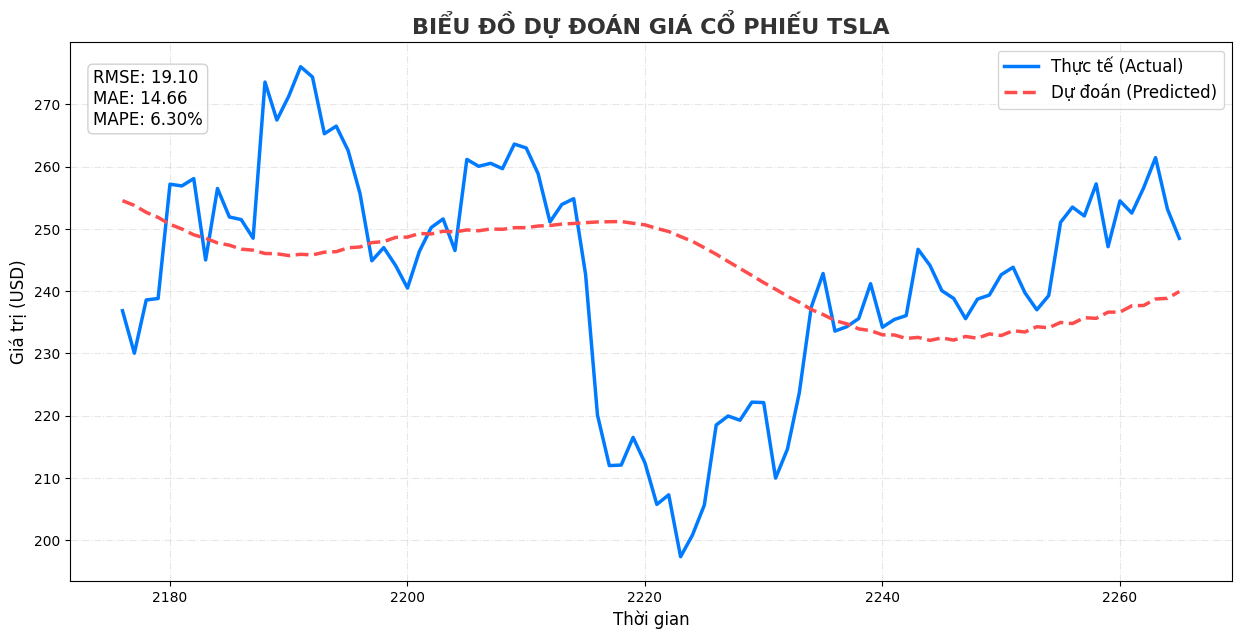

In [3]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

STOCK_SYMBOL = "TSLA" 
MODEL_PATH = f"../experiments/{STOCK_SYMBOL}.keras"
CSV_PATH = f"../data/raw/{STOCK_SYMBOL}.csv"

# --- 1. LOAD MODEL & DATA ---
if not os.path.exists(MODEL_PATH):
    print(f"❌ Lỗi: Không tìm thấy file model tại {MODEL_PATH}")
else:
    print(f"✅ Đã tìm thấy model: {MODEL_PATH}")
    model = load_model(MODEL_PATH)

    # Đọc dữ liệu
    df = pd.read_csv(CSV_PATH)
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df = df.dropna(subset=['Close'])
    
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    data = df.filter(['Close']).values

    # --- 2. CHUẨN BỊ DỮ LIỆU TEST ---
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Lấy 90 ngày gần nhất để báo cáo (Số đẹp cho đồ án)
    LOOK_BACK = 60
    TEST_DAYS = 90
    
    if len(scaled_data) < (LOOK_BACK + TEST_DAYS):
        TEST_DAYS = len(scaled_data) - LOOK_BACK

    # Tạo dữ liệu test
    start_idx = len(scaled_data) - TEST_DAYS - LOOK_BACK
    test_segment = scaled_data[start_idx:]
    
    x_test = []
    y_true = []
    
    for i in range(LOOK_BACK, len(test_segment)):
        x_test.append(test_segment[i-LOOK_BACK:i, 0])
        y_true.append(test_segment[i, 0])
        
    x_test = np.array(x_test)
    y_true = np.array(y_true)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # --- 3. DỰ ĐOÁN ---
    print(f"Đang tính toán trên {TEST_DAYS} phiên giao dịch gần nhất...")
    predictions = model.predict(x_test, verbose=0)
    
    # Đảo ngược scale
    predictions = scaler.inverse_transform(predictions)
    y_true = scaler.inverse_transform(y_true.reshape(-1, 1))

    # --- 4. TÍNH CHỈ SỐ ĐÁNH GIÁ (QUAN TRỌNG CHO BÁO CÁO) ---
    rmse = math.sqrt(mean_squared_error(y_true, predictions))
    mae = mean_absolute_error(y_true, predictions)
    mape = np.mean(np.abs((y_true - predictions) / y_true)) * 100

    print(f"\nKẾT QUẢ ĐÁNH GIÁ ĐỘ CHÍNH XÁC ({STOCK_SYMBOL}):")
    print(f"   - RMSE (Sai số toàn phương trung bình): {rmse:.2f}")
    print(f"   - MAE  (Sai số tuyệt đối trung bình):   {mae:.2f}")
    print(f"   - MAPE (Sai số phần trăm):              {mape:.2f}%")
    
    if mape < 5:
        print("   => ĐÁNH GIÁ: Model hoạt động RẤT TỐT")
    else:
        print("   => ĐÁNH GIÁ: Model hoạt động CHẤP NHẬN ĐƯỢC")

    # --- 5. VẼ BIỂU ĐỒ ---
    plt.figure(figsize=(15, 7))
    
    # Lấy ngày tháng để hiển thị
    display_dates = df.index[-TEST_DAYS:]
    
    plt.plot(display_dates, y_true, color='#007bff', label='Thực tế (Actual)', linewidth=2.5)
    plt.plot(display_dates, predictions, color='#ff4d4d', label='Dự đoán (Predicted)', linewidth=2.5, linestyle='--')
    
    plt.title(f'BIỂU ĐỒ DỰ ĐOÁN GIÁ CỔ PHIẾU {STOCK_SYMBOL}', fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel('Thời gian', fontsize=12)
    plt.ylabel('Giá trị (USD)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3, linestyle='-.')
    
    # Hiển thị bảng kết quả nhỏ ngay trên biểu đồ
    stats_text = f'RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nMAPE: {mape:.2f}%'
    plt.text(0.02, 0.95, stats_text, transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='#cccccc'))
    
    plt.show()